In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv('churn.csv')

# Preprocess
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction & evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [2]:
!pip install xgboost


In [4]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:05:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



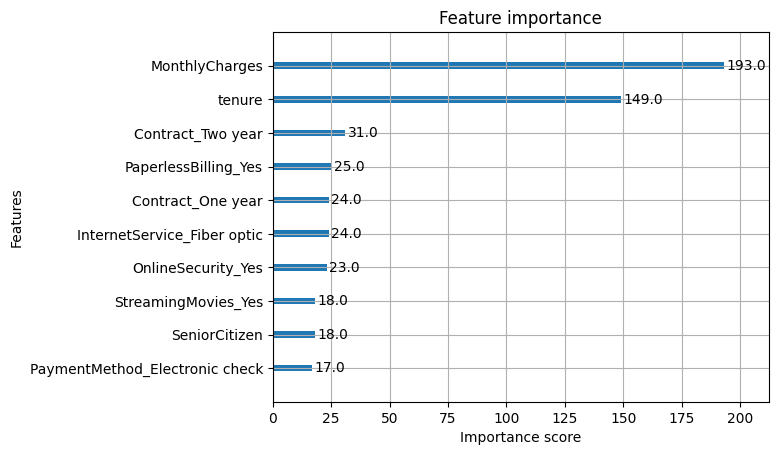

In [5]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model_xgb, max_num_features=10)
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:09:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:10:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:10:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:10:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:11:13] WARNING: /w

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [7]:
final_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
final_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:59:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [9]:
import joblib
joblib.dump(final_model, 'xgb_churn_model.pkl')


['xgb_churn_model.pkl']

In [10]:
model = joblib.load('xgb_churn_model.pkl')
sample = X_test.iloc[0:1]  # First test sample (as DataFrame)
prediction = model.predict(sample)
probability = model.predict_proba(sample)

print("Prediction:", "Churn" if prediction[0] == 1 else "No Churn")
print("Probability of Churn:", probability[0][1])


Prediction: Churn
Probability of Churn: 0.68986493


In [11]:
!pip install ipywidgets scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00


In [24]:
from google.colab import files
uploaded = files.upload()  # Upload your 'xgb_churn_model.pkl'


Saving xgb_churn_model.pkl to xgb_churn_model (2).pkl
Saving xgb_features.json to xgb_features (2).json


In [3]:
df = pd.read_csv('churn.csv')

# Drop customerID — it’s just an identifier, not a useful feature
df.drop('customerID', axis=1, inplace=True)

# Convert target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Handle TotalCharges (convert from string to float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values after conversion
df = df.dropna()

# Optional: Combine some categories (like "No internet service" → "No")
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_fix:
    df[col] = df[col].replace({'No internet service': 'No'})

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import joblib

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Save the model and feature list
joblib.dump(model, 'xgb_churn_model.pkl')

# Save feature columns
import json
with open('xgb_features.json', 'w') as f:
    json.dump(X.columns.tolist(), f)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:17:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
# After training the model
import json

with open("xgb_features.json", "w") as f:
    json.dump(X.columns.tolist(), f)


In [27]:
# Load feature order
import json

with open("xgb_features.json", "r") as f:
    feature_order = json.load(f)
input_dict=X.columns.tolist()
# Assume `input_dict` has all required keys
input_df = pd.DataFrame([input_dict])

# Fill missing columns (if any)
for col in feature_order:
    if col not in input_df.columns:
        input_df[col] = 0

# Ensure correct column order
input_df = input_df[feature_order]


In [ ]:
import pandas as pd
import joblib
import ipywidgets as widgets
from IPython.display import display
import json

# 🔹 Load model + feature list
model = joblib.load("xgb_churn_model.pkl")
with open("xgb_features.json", "r") as f:
    feature_order = json.load(f)

# 🔹 Create widgets for relevant features
tenure = widgets.IntSlider(value=12, min=0, max=72, description='Tenure:')
monthly_charges = widgets.FloatText(value=70.0, description='Monthly ₹:')
total_charges = widgets.FloatText(value=850.0, description='Total ₹:')
gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
senior = widgets.Dropdown(options=['Yes', 'No'], description='Senior:')
partner = widgets.Dropdown(options=['Yes', 'No'], description='Partner:')
dependents = widgets.Dropdown(options=['Yes', 'No'], description='Dependents:')
phone = widgets.Dropdown(options=['Yes', 'No'], description='PhoneService:')
internet = widgets.Dropdown(options=['DSL', 'Fiber optic', 'No Internet'], description='Internet:')
contract = widgets.Dropdown(options=['Month-to-month', 'One year', 'Two year'], description='Contract:')
paperless = widgets.Dropdown(options=['Yes', 'No'], description='PaperlessBilling:')
payment = widgets.Dropdown(
    options=['Electronic check', 'Mailed check', 'Credit card (automatic)', 'Bank transfer (automatic)'],
    description='Payment Method:'
)

ui = widgets.VBox([tenure, monthly_charges, total_charges, gender, senior, partner,
                   dependents, phone, internet, contract, paperless, payment])

# 🔹 Define prediction function
def predict_churn(t, m_chg, t_chg, g, s, p, d, phone_svc, net, cont, paper, pay):
    input_dict = {
        'tenure': t,
        'MonthlyCharges': m_chg,
        'TotalCharges': t_chg,
        'gender_Male': 1 if g == 'Male' else 0,
        'SeniorCitizen': 1 if s == 'Yes' else 0,
        'Partner_Yes': 1 if p == 'Yes' else 0,
        'Dependents_Yes': 1 if d == 'Yes' else 0,
        'PhoneService_Yes': 1 if phone_svc == 'Yes' else 0,
        'MultipleLines_Yes': 0,
        'MultipleLines_No phone service': 1 if phone_svc == 'No' else 0,
        'InternetService_Fiber optic': 1 if net == 'Fiber optic' else 0,
        'InternetService_No': 1 if net == 'No Internet' else 0,
        'OnlineSecurity_Yes': 0,
        'OnlineBackup_Yes': 0,
        'DeviceProtection_Yes': 0,
        'TechSupport_Yes': 0,
        'StreamingTV_Yes': 0,
        'StreamingMovies_Yes': 0,
        'Contract_One year': 1 if cont == 'One year' else 0,
        'Contract_Two year': 1 if cont == 'Two year' else 0,
        'PaperlessBilling_Yes': 1 if paper == 'Yes' else 0,
        'PaymentMethod_Credit card (automatic)': 1 if pay == 'Credit card (automatic)' else 0,
        'PaymentMethod_Electronic check': 1 if pay == 'Electronic check' else 0,
        'PaymentMethod_Mailed check': 1 if pay == 'Mailed check' else 0,
    }

    # Fill missing features with 0
    for col in feature_order:
        if col not in input_dict:
            input_dict[col] = 0

    input_df = pd.DataFrame([input_dict])[feature_order]

    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]

    if pred == 1:
        print(f"⚠️ Likely to Churn (probability = {prob:.2f})")
    else:
        print(f"✅ Not Likely to Churn (probability = {prob:.2f})")

# 🔹 Connect widgets to logic
out = widgets.interactive_output(predict_churn, {
    't': tenure,
    'm_chg': monthly_charges,
    't_chg': total_charges,
    'g': gender,
    's': senior,
    'p': partner,
    'd': dependents,
    'phone_svc': phone,
    'net': internet,
    'cont': contract,
    'paper': paperless,
    'pay': payment
})

display(ui, out)


c:\Users\nagar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [09:14:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\data\../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)
